<a href="https://colab.research.google.com/github/DanAlin19/AAD/blob/main/AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kaggle

kaggle.api.dataset_download_files('atharvasoundankar/global-music-streaming-trends-and-listener-insights', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-music-streaming-trends-and-listener-insights


In [4]:
import pandas as pd
df = pd.read_csv('./data/Global_Music_Streaming_Listener_Preferences.csv', sep=',')
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


Detalii despre valorile din coloane

In [5]:
df.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,36.664000,309.237200,253.51720,50.296464,42.391060
std,13.763844,172.029822,146.36928,23.171936,21.444121
min,13.000000,10.000000,1.00000,10.020000,5.000000
25%,25.000000,161.000000,126.00000,30.147500,24.195000
50%,37.000000,316.000000,254.00000,50.420000,41.960000
75%,49.000000,457.250000,382.00000,70.337500,60.740000
max,60.000000,600.000000,500.00000,89.990000,79.990000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

Verificare valori nule

In [7]:
df.isnull().sum()

,0
User_ID,0
Age,0
Country,0
Streaming Platform,0
Top Genre,0
Minutes Streamed Per Day,0
Number of Songs Liked,0
Most Played Artist,0
Subscription Type,0
Listening Time (Morning/Afternoon/Night),0


Verificare valori duplicate

In [8]:
df.duplicated().sum()

np.int64(0)

Verificari inconsistente de format sau scriere

In [9]:
df['Listening Time (Morning/Afternoon/Night)'].unique()

array(['Afternoon', 'Night', 'Morning'], dtype=object)

In [10]:
df['Streaming Platform'].value_counts()

,count
Streaming Platform,
Amazon Music,861
Tidal,850
Deezer,844
Spotify,827
YouTube,822
Apple Music,796


In [11]:
df['Top Genre'].value_counts()

,count
Top Genre,
Reggae,532
Jazz,532
EDM,528
Rock,516
R&B,495
Metal,491
Hip-Hop,485
Country,484
Classical,475


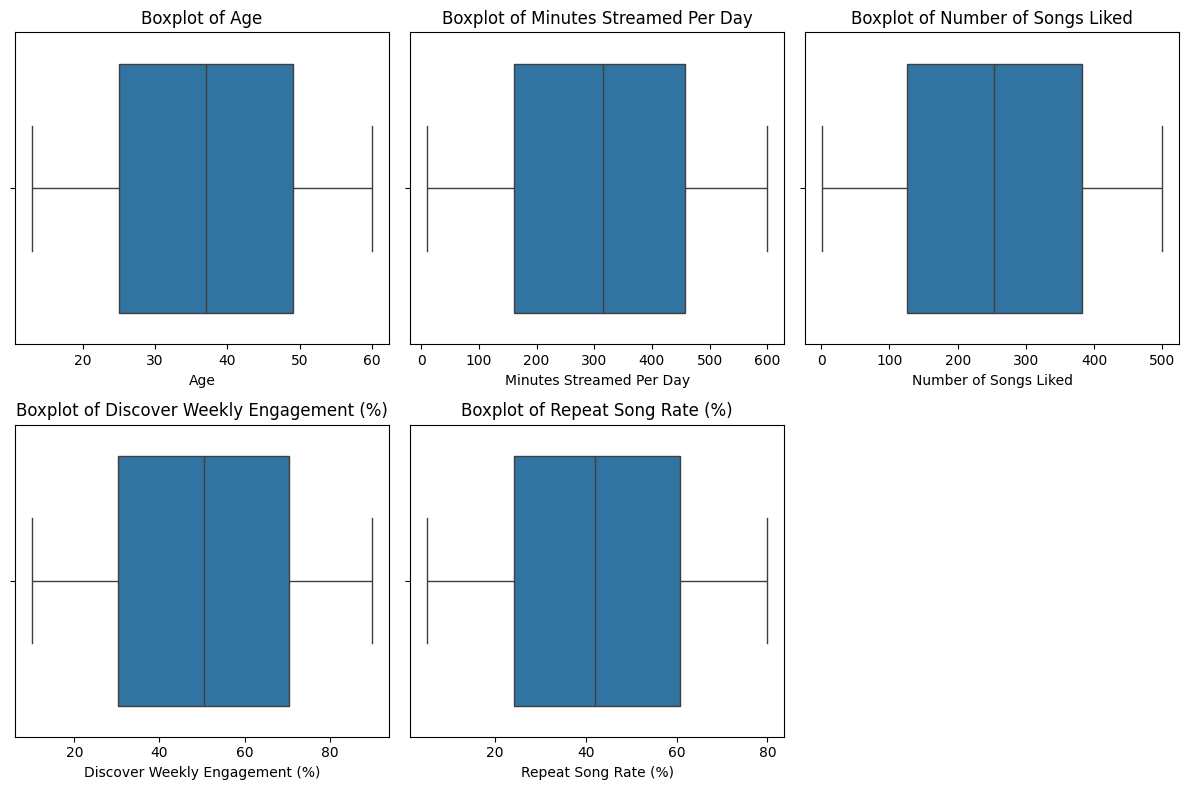

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Analiza cantitativa cu vizualizari


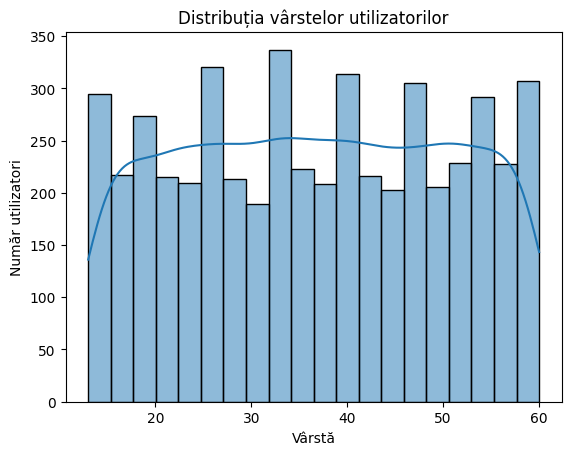

In [13]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribuția vârstelor utilizatorilor")
plt.xlabel("Vârstă")
plt.ylabel("Număr utilizatori")
plt.show()

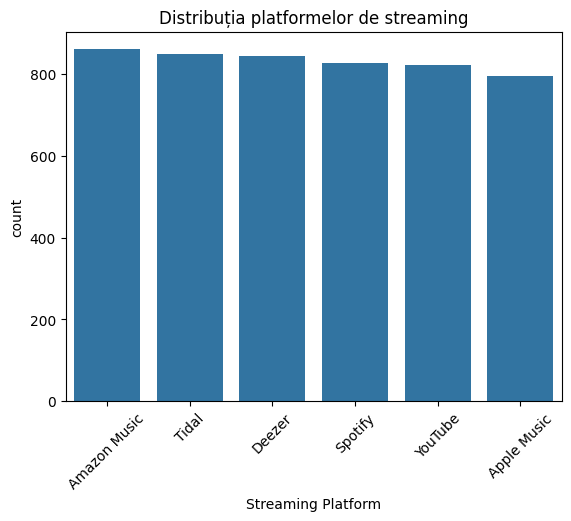

In [14]:
sns.countplot(x='Streaming Platform', data=df, order=df['Streaming Platform'].value_counts().index)
plt.title("Distribuția platformelor de streaming")
plt.xticks(rotation=45)
plt.show()

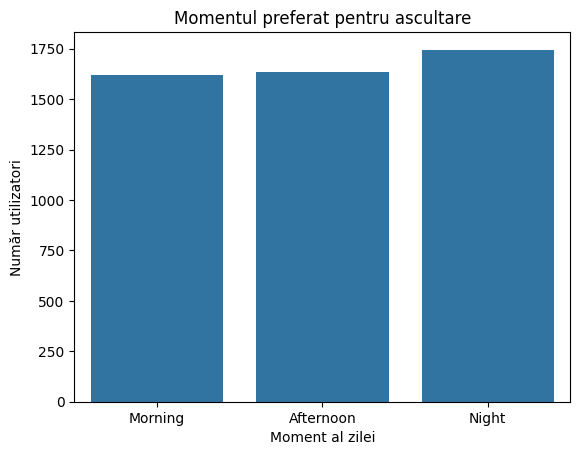

In [15]:
sns.countplot(x='Listening Time (Morning/Afternoon/Night)', data=df, order=['Morning', 'Afternoon', 'Night'])
plt.title("Momentul preferat pentru ascultare")
plt.xlabel("Moment al zilei")
plt.ylabel("Număr utilizatori")
plt.show()


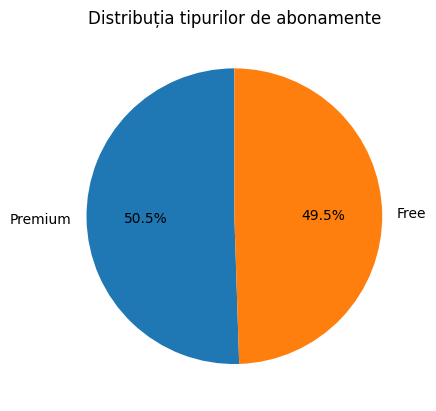

In [16]:
df['Subscription Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribuția tipurilor de abonamente")
plt.ylabel("")
plt.show()


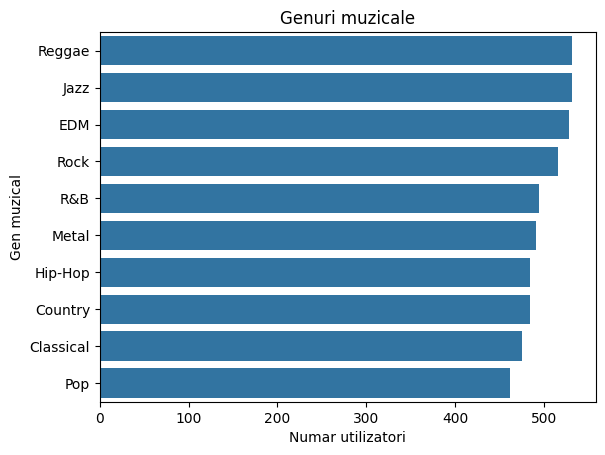

In [17]:
top_genres = df['Top Genre'].value_counts()
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Genuri muzicale")
plt.xlabel("Numar utilizatori")
plt.ylabel("Gen muzical")
plt.show()


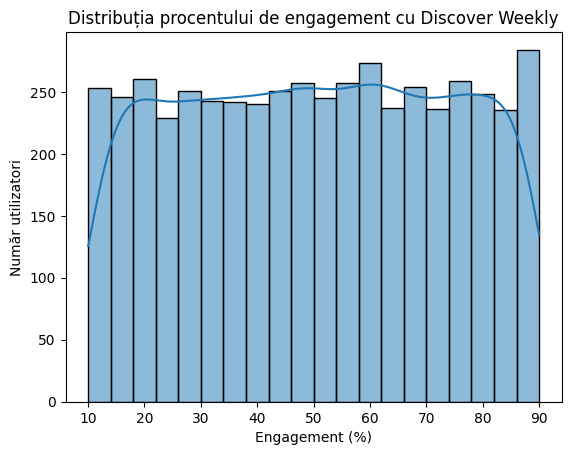

In [18]:
sns.histplot(df['Discover Weekly Engagement (%)'], bins=20, kde=True)
plt.title("Distribuția procentului de engagement cu Discover Weekly")
plt.xlabel("Engagement (%)")
plt.ylabel("Număr utilizatori")
plt.show()


Corelari

Corelari valori numerice

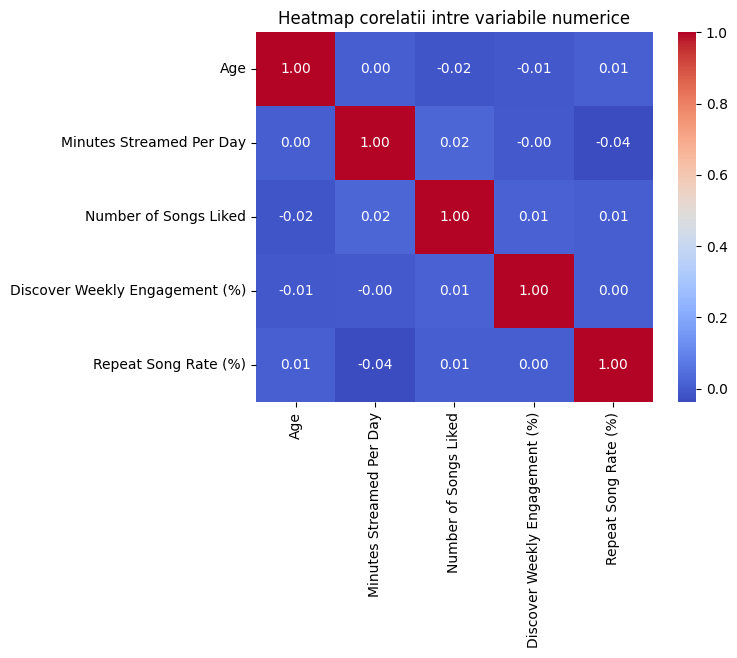

In [19]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap corelatii intre variabile numerice")
plt.show()

Corelari varsta si minute ascultate pe zi (vrem sa vedem daca varsta influenteaza cat de mult timp petrec persoanele ascultand muzica)

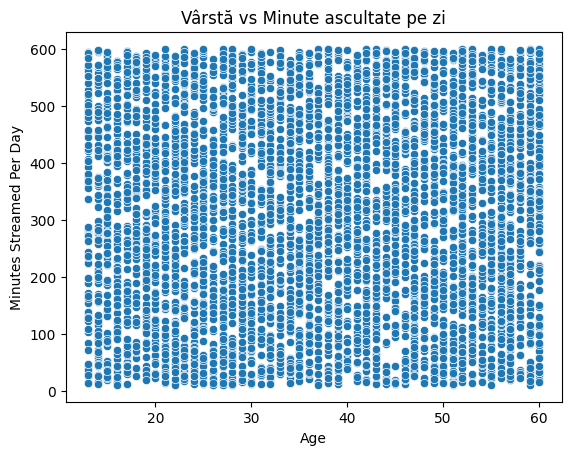

,Age,Minutes Streamed Per Day
Age,1.000000,0.004166
Minutes Streamed Per Day,0.004166,1.000000


In [20]:
sns.scatterplot(x='Age', y='Minutes Streamed Per Day', data=df)
plt.title("Vârstă vs Minute ascultate pe zi")
plt.show()

df[['Age', 'Minutes Streamed Per Day']].corr()


Corelari intre numar melodii apreciate si timp de ascultare zilnic (vrem sa vedem daca cei care petrec mai mult timp ascultand muzica dau like la mai multe piese)

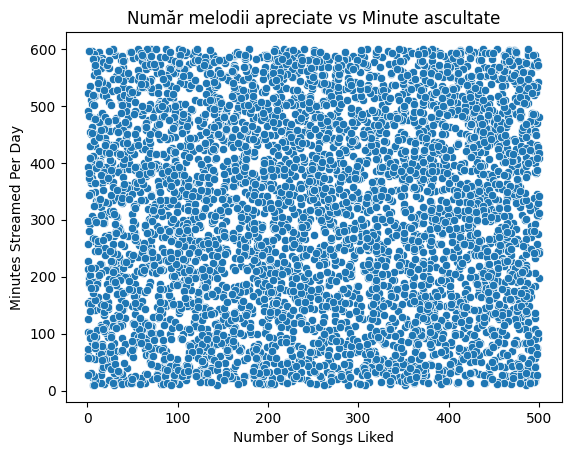

,Number of Songs Liked,Minutes Streamed Per Day
Number of Songs Liked,1.000000,0.023487
Minutes Streamed Per Day,0.023487,1.000000


In [21]:
sns.scatterplot(x='Number of Songs Liked', y='Minutes Streamed Per Day', data=df)
plt.title("Număr melodii apreciate vs Minute ascultate")
plt.show()

df[['Number of Songs Liked', 'Minutes Streamed Per Day']].corr()


Corelari intre rata de descoperire a pieselor noi saptamanala si rata de repetare a pieselor (vrem sa vedem daca cei care descopera muzica noua, nu repeta aceleasi piese)

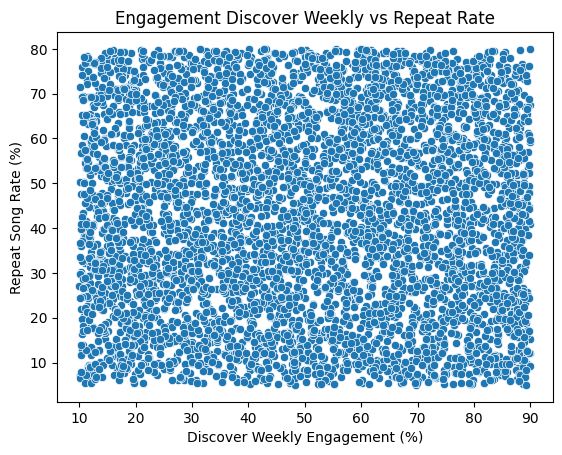

,Discover Weekly Engagement (%),Repeat Song Rate (%)
Discover Weekly Engagement (%),1.000000,0.004186
Repeat Song Rate (%),0.004186,1.000000


In [22]:
sns.scatterplot(x='Discover Weekly Engagement (%)', y='Repeat Song Rate (%)', data=df)
plt.title("Engagement Discover Weekly vs Repeat Rate")
plt.show()

df[['Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']].corr()


Corelari intre tipul de subscriptie si minutele de ascultare zilnice (vrem sa vedem daca tipul de subscriptie influenteaza timpul de ascultare)

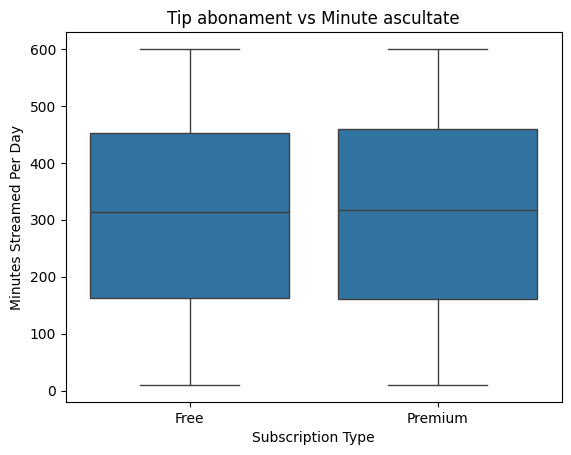

In [23]:
df.groupby('Subscription Type')['Minutes Streamed Per Day'].mean()
sns.boxplot(x='Subscription Type', y='Minutes Streamed Per Day', data=df)
plt.title("Tip abonament vs Minute ascultate")
plt.show()

In [27]:
# Împărțirea dataset-ului pe intervale de vârstă
df_13_24 = df[(df['Age'] >= 13) & (df['Age'] <= 24)]
df_25_39 = df[(df['Age'] >= 25) & (df['Age'] <= 39)]
df_40_60 = df[(df['Age'] >= 40) & (df['Age'] <= 60)]

In [28]:
df_13_24.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,18.550413,311.215702,262.401653,49.900727,41.570364
std,3.457819,173.754170,147.190347,23.092128,21.414219
min,13.000000,10.000000,1.000000,10.040000,5.110000
25%,16.000000,157.250000,130.250000,29.100000,23.845000
50%,19.000000,314.000000,265.500000,50.665000,40.825000
75%,22.000000,458.750000,395.000000,69.345000,60.105000
max,24.000000,600.000000,500.000000,89.990000,79.990000


In [32]:
df_25_39.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,32.021999,304.580138,251.399749,50.754965,43.043947
std,4.308557,169.845375,145.094924,23.393737,21.446824
min,25.000000,10.000000,1.000000,10.020000,5.030000
25%,28.000000,156.000000,127.000000,30.400000,24.855000
50%,32.000000,312.000000,249.000000,51.360000,43.500000
75%,36.000000,450.500000,380.000000,70.805000,61.445000
max,39.000000,600.000000,499.000000,89.970000,79.960000


In [30]:
df_40_60.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,49.989541,311.517963,250.160528,50.182487,42.370277
std,6.081519,172.656869,146.702410,23.059387,21.452507
min,40.000000,10.000000,1.000000,10.140000,5.000000
25%,45.000000,166.000000,122.500000,30.860000,23.765000
50%,50.000000,318.000000,248.000000,49.580000,41.830000
75%,55.000000,460.000000,377.000000,70.770000,60.555000
max,60.000000,600.000000,500.000000,89.930000,79.980000


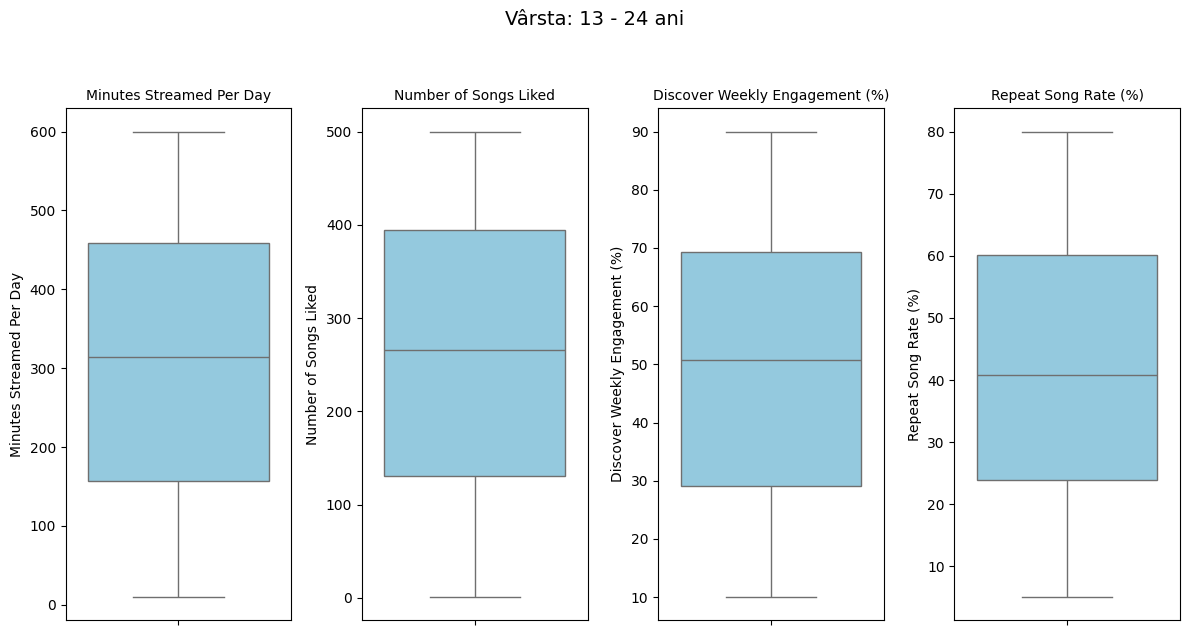

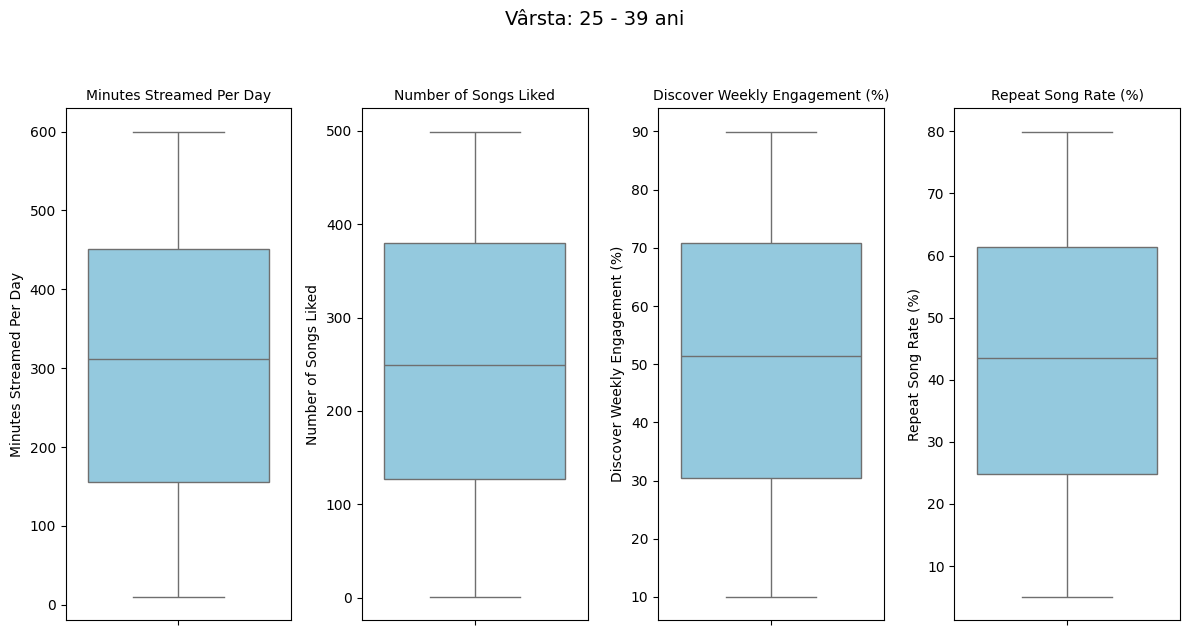

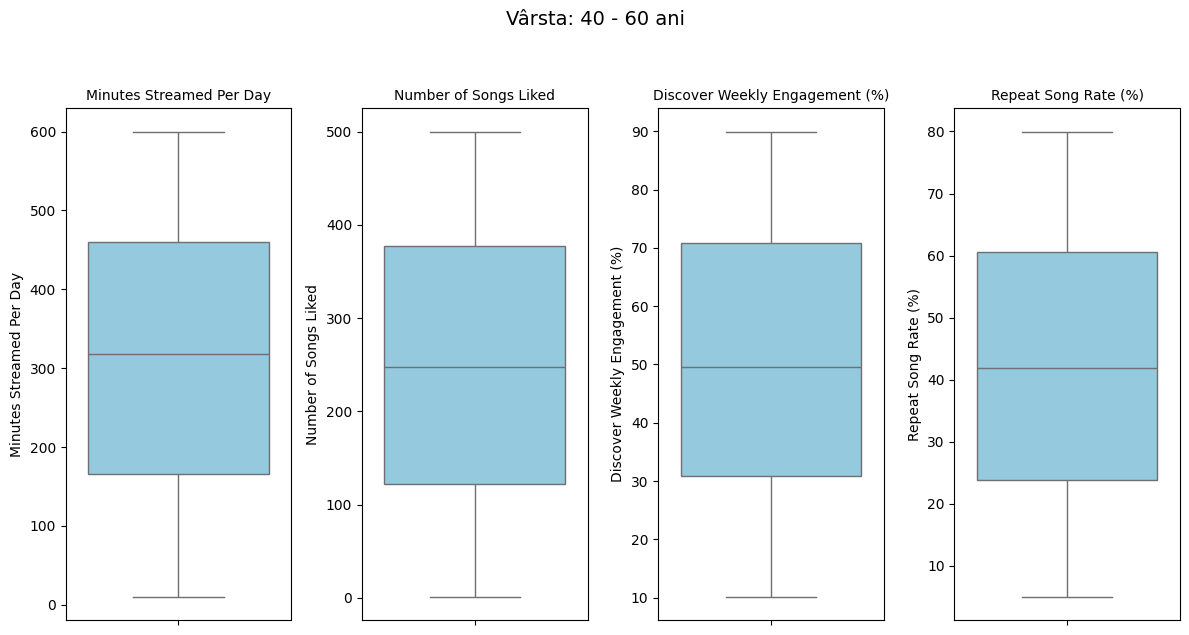

In [31]:
# Funcție pentru a crea boxplot-urile
def plot_boxplots(data, age_range_title):
    plt.figure(figsize=(12, 6))
    features = ['Minutes Streamed Per Day', 'Number of Songs Liked',
                'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 4, i)
        sns.boxplot(y=data[feature], color='skyblue')
        plt.title(feature, fontsize=10)
        plt.xlabel('')  # scoate labelul de pe axa x
        plt.tight_layout()

    plt.suptitle(f'{age_range_title}', fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

# Apeluri pentru fiecare subset
plot_boxplots(df_13_24, 'Vârsta: 13 - 24 ani')
plot_boxplots(df_25_39, 'Vârsta: 25 - 39 ani')
plot_boxplots(df_40_60, 'Vârsta: 40 - 60 ani')